# Task 1

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


class NeuralNetworkOne:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        self.h1 = self.h2 = self.h3 = self.out = Neuron(weights, 0)

    def feedforward(self, x):
        hOut = np.array([h.feedforward(x) for h in [self.h1, self.h2, self.h3]])
        oOut = self.o1.feedforward(hOut)
        return oOut

class NeuralNetwork2:
    def __init__(self):
        weights = np.array([1, 0])
        self.h1 = self.h2 = self.o1 = self.out = Neuron(weights, 1)

    def feedforward(self, x):
        hOut = np.array([h.feedforward(x) for h in [self.h1, self.h2]])
        oOut = np.array([h.feedforward(hOut) for h in [self.o1, self.out]])
        return oOut

# Task 2

In [19]:
import numpy as np

def sigmoid1(x):
    return 1 / (1 + np.exp(-x))
def sigmoid2(x):
    return np.tanh(x)
def sigmoid3(x):
    return max(0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs, choiceOfSig = 1):
        total = np.dot(self.weights, inputs) + self.bias
        if (choiceOfSig == 1):
            return sigmoid1(total)
        elif(choiceOfSig == 2):
            return sigmoid2(total)
        elif(choiceOfSig == 3):
            return sigmoid3(total)


class NeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        self.h1 = self.h2 = self.h3 = self.out = Neuron(weights, 0)

    def feedforward(self, x, choiceOfSig = 1):
        hOut = np.array([h.feedforward(x, choiceOfSig) for h in [self.h1, self.h2, self.h3]])
        oOut = self.out.feedforward(hOut, choiceOfSig)
        return oOut


network = NeuralNetwork()

input = [1, 0, 1]
print(network.feedforward(input, 1))
print(network.feedforward(input, 2))
print(network.feedforward(input, 3))

0.7496202290400686
0.8152177266419572
1.5


# Task 3

Test accuracy: 0.933
Training accuracy: 0.992
Loss: 0.062378386935669564
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 641
Name of Output Layer Activation Function: softmax


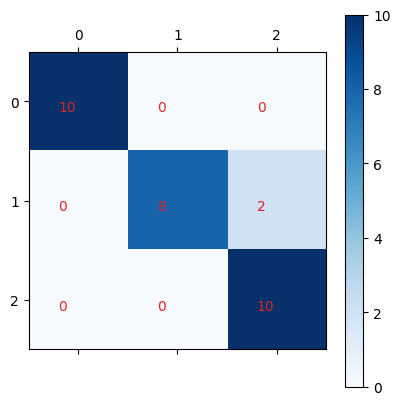

Train/Test Sizes:  (24, 1) (6, 1) (24,) (6,)
Test R^2 Score: 0.971
Training R^2 Score: 0.948
Loss: 16873681.68996009
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 30344
Name of Output Layer Activation Function: identity


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor


def plot_confusion_matrix(y_test, y_pred):
    confusionM = confusion_matrix(y_test, y_pred)
    size = range(len(confusionM))

    plt.matshow(confusionM, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(size, size)
    plt.xticks(size, size)
    plt.colorbar()

    for ind in size:
        for jnd in size:
            plt.text(ind - 0.2, jnd + 0.1, str(confusionM[jnd, ind]), color='tab:red')
            
    plt.show()


def classification():
    iris = pd.read_csv(
        'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
    x_iris, y_iris = iris.iloc[:, :-1], iris.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, train_size=0.8, test_size=0.2, stratify=y_iris,
                                                        random_state=123)

    mlp_classifier = MLPClassifier(random_state=123, max_iter=1000)
    mlp_classifier.fit(x_train, y_train)

    print('Test accuracy: %.3f' % mlp_classifier.score(x_test, y_test))
    print('Training accuracy: %.3f' % mlp_classifier.score(x_train, y_train))
    print("Loss:", mlp_classifier.loss_)
    print("Number of Coefs:", len(mlp_classifier.coefs_))
    print("Number of Intercepts:", len(mlp_classifier.intercepts_))
    print("Number of Iterations for Which Estimator Ran:", mlp_classifier.n_iter_)
    print("Name of Output Layer Activation Function:", mlp_classifier.out_activation_)

    plot_confusion_matrix(y_test, mlp_classifier.predict(x_test))


def regression():
    salary = pd.read_csv(
        'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
    x_salary, y_salary = salary.iloc[:, :-1], salary.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x_salary, y_salary, train_size=0.8, test_size=0.2,
                                                        random_state=123)
    print('Train/Test Sizes: ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    mlp_regressor = MLPRegressor(random_state=123, max_iter=50000)
    mlp_regressor.fit(x_train, y_train)

    print('Test R^2 Score: %.3f' % mlp_regressor.score(x_test, y_test))
    print('Training R^2 Score: %.3f' % mlp_regressor.score(x_train, y_train))
    print("Loss:", mlp_regressor.loss_)
    print("Number of Coefs:", len(mlp_regressor.coefs_))
    print("Number of Intercepts:", len(mlp_regressor.intercepts_))
    print("Number of Iterations for Which Estimator Ran:", mlp_regressor.n_iter_)
    print("Name of Output Layer Activation Function:", mlp_regressor.out_activation_)


classification()
regression()